# 목차

* 데이터 불러오기
* 딥러닝 네트워크
* 딥러닝 개선하기
* 결과
* 회고
* Reference
---------------------------
루브릭

아래의 기준을 바탕으로 프로젝트를 평가합니다.

* 평가문항	상세기준
1. 이미지 분류기 모델이 성공적으로 만들어졌는가?

> 학습과정이 정상적으로 수행되었으며, 학습 결과에 대한 그래프를 시각화(ex. train acc / train loss / val acc / val loss 등) 해 보았음

2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?

> 오버피팅 극복을 위하여 데이터셋의 다양성, 정규화 등을 2가지 이상 시도해보았음

3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?

> 60% 이상 도달하였음

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# 런타임 유형 바꿀 것

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기



## 이미지 리사이징

In [27]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

각기 다른 환경에서 촬영한 세 사람의 사진을 학습 데이터로 가져온다.

In [28]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/아이펠 데이터/가위바위보/scissor/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

789  images to be resized.
789  images resized.
가위 이미지 resize 완료!


In [29]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/아이펠 데이터/가위바위보/rock/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

833  images to be resized.
833  images resized.
바위 이미지 resize 완료!


In [30]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/아이펠 데이터/가위바위보/paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

809  images to be resized.
809  images resized.
보 이미지 resize 완료!


In [31]:
789+809+833

2431

## 데이터 라벨링

In [32]:
def load_data(img_path, number_of_data=2431):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/아이펠 데이터/가위바위보"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2431 입니다.
x_train shape: (2431, 28, 28, 3)
y_train shape: (2431,)


라벨:  0


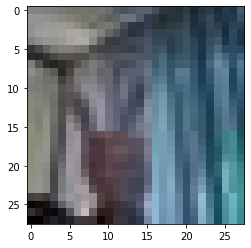

In [33]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 딥러닝 네트워크



## 모델 설계하기

In [34]:
from tensorflow import keras

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 800)               0         
                                                                 
 dense_12 (Dense)            (None, 32)               

딥러닝 네트워크에서 relu 함수를 사용해 비선형을 구현하지만 마지막에는 softmax 함수를 사용한다. 그렇게 하면 최종 결과가 각각의 타겟 데이터에 대한 확률 분포로써 나오게 되기 때문에 모델이 어떤 예측을 하고있는지 직관적으로 알 수 있다.

## 모델 학습

In [35]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
76/76 [==============================] - 1s 4ms/step - loss: 0.9399 - accuracy: 0.5817
Epoch 2/10
76/76 [==============================] - 0s 4ms/step - loss: 0.3838 - accuracy: 0.8836
Epoch 3/10
76/76 [==============================] - 0s 4ms/step - loss: 0.2162 - accuracy: 0.9292
Epoch 4/10
76/76 [==============================] - 0s 4ms/step - loss: 0.1705 - accuracy: 0.9473
Epoch 5/10
76/76 [==============================] - 0s 4ms/step - loss: 0.1057 - accuracy: 0.9700
Epoch 6/10
76/76 [==============================] - 0s 4ms/step - loss: 0.0805 - accuracy: 0.9803
Epoch 7/10
76/76 [==============================] - 0s 4ms/step - loss: 0.0739 - accuracy: 0.9794
Epoch 8/10
76/76 [==============================] - 0s 4ms/step - loss: 0.0539 - accuracy: 0.9848
Epoch 9/10
76/76 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9897
Epoch 10/10
76/76 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9947


epoch가 진행될수록 loss는 감소하고 accuracy는 증가하는 모습을 볼 수 있다.

## 모델 평가



### 테스트 데이터셋 불러오기

학습 데이터와 별개의 사람이 촬영한 사진을 테스트 데이터로 가져온다.

In [36]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/아이펠 데이터/가위바위보/testdata/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")


200  images to be resized.
200  images resized.
가위 이미지 resize 완료!


In [37]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/아이펠 데이터/가위바위보/testdata/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
바위 이미지 resize 완료!


In [38]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/아이펠 데이터/가위바위보/testdata/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
보 이미지 resize 완료!


In [39]:
def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/testdata/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/testdata/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/testdata/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("평가데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/아이펠 데이터/가위바위보"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

평가데이터(x_test)의 이미지 개수는 600 입니다.
x_test shape: (2431, 28, 28, 3)
y_test shape: (2431,)


### 테스트 결과

In [40]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

19/19 - 0s - loss: 8.8273 - accuracy: 0.4167 - 183ms/epoch - 10ms/step
test_loss: 8.82727336883545
test_accuracy: 0.4166666567325592


학습 때와는 달리 매우 높은 loss와 낮은 accuracy를 보인다. 하지만 정확도가 1/3 보다는 높으므로 학습이 올바른 방향으로 이루어지기는 했음을 알 수 있다. 

# 딥러닝 개선하기

## 모델의 추론 살펴보기

In [41]:
# 모델의 추론과 실제 비교

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [6.3490190e-02 3.9068162e-15 9.3650985e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


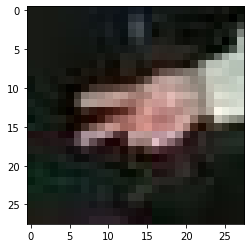

In [42]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.6947316e-03 5.6862154e-12 9.9730527e-01]
라벨: 1, 예측결과: 2


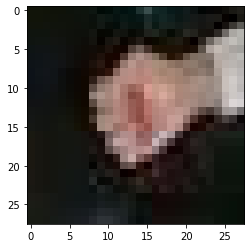

예측확률분포: [6.8886072e-04 4.8295426e-12 9.9931109e-01]
라벨: 1, 예측결과: 2


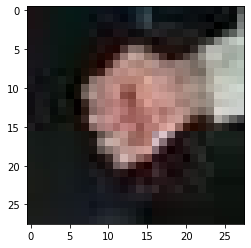

예측확률분포: [6.9447900e-08 4.4849128e-11 9.9999988e-01]
라벨: 1, 예측결과: 2


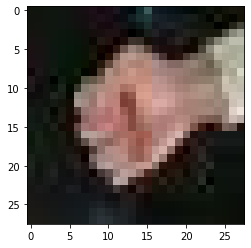

예측확률분포: [4.9265388e-08 5.6396516e-11 1.0000000e+00]
라벨: 1, 예측결과: 2


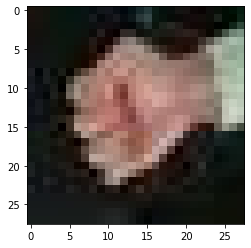

예측확률분포: [4.2091823e-01 2.1603426e-14 5.7908171e-01]
라벨: 0, 예측결과: 2


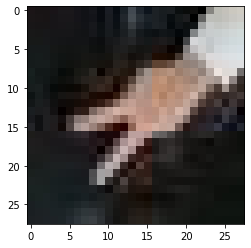

In [43]:
# 모델이 틀린 경우

import random
wrong_predict_list=[]
for i,_ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

위 결과를 봤을 때 틀린 예측임에도 모델은 높은 확신을 가지고 있음을 볼 수 있었다.

따라서 학습된 모델이 테스트 데이터에 대해서 판단을 제대로 내리지 못 하고 있다는 것을 알 수 있다.

## 하이퍼 파라미터 바꾸기

In [44]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=10
# --------------------------------

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 800)               0         
                                                                 
 dense_14 (Dense)            (None, 32)               

In [45]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=15
# --------------------------------

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (None, 32)               

In [46]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=32
n_dense=64
n_train_epoch=15
# --------------------------------

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 800)               0         
                                                                 
 dense_18 (Dense)            (None, 64)               

In [47]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=32
n_dense=64
n_train_epoch=20
# --------------------------------

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 800)               0         
                                                                 
 dense_20 (Dense)            (None, 64)              

In [66]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=300
n_train_epoch=15
# --------------------------------

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_29 (Flatten)        (None, 1600)              0         
                                                                 
 dense_57 (Dense)            (None, 300)             

n_channel_1=32
n_channel_2=64
n_dense=300
n_train_epoch=15

하이퍼 파라미터가 위의 값이 되어서야 겨우 정확도가 60%를 달성한 모습이다.

# 결과

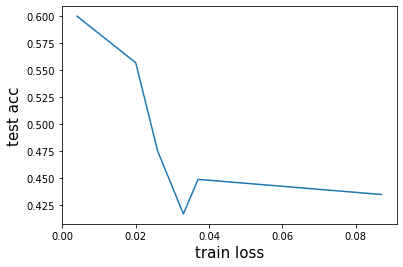

In [75]:
# 앞의 결과를 train loss 크기로 나열

data_dict = {'train loss': [0.087, 0.037, 0.033, 0.026, 0.020, 0.004], 'test acc': [0.435, 0.449, 0.417, 0.475, 0.557, 0.600]}

plt.plot('train loss', 'test acc', data=data_dict)
plt.xlabel('train loss', fontsize=15)
plt.ylabel('test acc', fontsize=15)
plt.show()

일반적으로 train loss 가 작아질수록 test acc도 증가하고 있다.

# 회고

이번에는 이미지 파일을 보고 가위, 바위, 보 중 어떤 것인지 인지할 수 있도록 딥러닝 네트워크를 만들어보았다. 이 딥러닝 네트워크를 사용한 회귀모델은 데이터를 여러 계층을 통해 매개변수를 스스로 학습하고 그것을 가지고 이후 테스트 데이터셋이 왔을 때 예측을 시도한다. 이 학습을 위해 먼저 데이터를 모델이 읽을 수 있도록 만들어야했는데 우선 리사이징을 해서 픽셀의 수를 줄이고 3차원 RGB 값을 행렬로 표현하였다. 이렇게 만들어진 각각의 파일들에 타겟 데이터를 라벨로 붙였다.

첫번째로 궁금증이 생겼던 점은 이미지를 리사이징한 것이었다. 나는 픽셀의 수가 더 많을수록, 즉 고화질의 사진일수록 더욱 이미지가 명확해지고 모델의 성능이 증가할 것이라 예상했다. 그래서 기존의 방법대로 28\*28 사이즈로 학습을 한 이후 이것의 4배인 56*56 으로도 모델을 학습시켜 테스트 데이터셋에 대한 예측 성능을 보았다. 그러자 결과는 내 예상과는 반대로 해상도를 늘렸을 때 오히려 성능이 하락하는 모습을 보였다.

이미지의 크기를 늘렸으므로 당연히 이미지 하나가 가진 데이터의 양이 크게 증가해 모델이 학습하는 속도도 꽤나 느려졌었는데 오히려 성능이 떨어진 것은 처음에는 이해하기 어려웠다. 그러나 얼마 전 convolution layer에 대해서 배웠을 때가 생각났다. 해상도가 늘어나면서 데이터의 수가 크게 늘어나 오히려 모델이 어떤 부분이 중요한 데이터인지 파악하는데 더 난항을 겪었으리라 예상했다. 시퀀셜 모델에서는 이미지의 픽셀을 병합하여 처리하면서 특징적인 부분을 잡아내고 학습속도를 높인다. 그런데 이 이미지의 크기를 늘려서 오히려 모델을 방해한 꼴이 된 것이다. 물론 모델을 여기에 맞게 수정하면 떨어진 성능이 되돌아오겠지만 같은 일을 더 어렵게 할 뿐이었으므로 28*28로 리사이징한 모델만을 사용하기로 했다.

두번째 궁금증은 테스트 결과와 오버피팅에 대한 것이었다. 학습 과정에서는 정확도가 매우 높게 나왔음에도 불구하고 정작 테스트에서는 낮은 정확도가 나온 것이다. 사실 학습 데이터와는 전혀 다른 환경에서 다른 사람이 촬영한 사진을 테스트 데이터로 사용하여 일반적인 경우에 대한 모델의 정확도를 측정한 것이므로 정확도가 낮게 나올 수밖에 없었다. 이것을 해결하기 위해 파라미터를 조정하고자 했는데 오버피팅이 발목을 잡았다. 이미 학습에서는 정확도가 충분히 높게 나오고 있었는데 오버피팅을 피하면서 예측 정확도를 높여야만 했다. 이를 위해 데이터를 정규화했으며 여러 사람이 촬영한 사진을 사용했다. 그러자 epoch가 15일 때 정도를 기점으로 오버피팅이 나타나는 증상이 나오는 것을 확인할 수 있었으며 마지막에는 epoch를 15에 고정해두고 사용했다. 이 때 사진 파일들을 넣는 과정이 번거로워 더 많은 데이터를 넣지 않았었는데 사실 오버피팅은 데이터셋을 크게 늘리면 해결할 수 있으므로 다른 사람의 사진을 더 추가하면 쉽게 해결하거나 비교할만한 결과를 낼 수 있었을 것으로 생각한다. 하지만 당시엔 이 점을 바로 떠올리지 못 했다. 

그래서 나머지 하이퍼 파라미터를 바꿔가며 어떤 것이 테스트 정확도에 어떤 영향을 주는지 비교해가며 정확도를 60% 이상으로 올리기 위해 노력했다. 결국 dense가 매우 커져야만 한다는 결론을 얻었다. 만약 구글 코랩에서 런타임 유형을 적합한 것으로 바꾸지 않았다면 학습에만 엄청나게 오랜 시간이 걸렸을 것이다. 그나마도 dense가 더 올라가면 오버피팅 때문인지 정확도가 다시 내려가는 구간이 생겨서 적합한 수치를 찾는데에 시간이 걸렸다.

이 파라미터들을 비교하기 위해 그리드 서치를 사용하는 것 또한 고려해봤으나 처음에는 학습 결과가 더 좋은 것이 테스트 결과도 더 좋으리라는 보장이 없으므로 (각기 다른 사람이 찍은 사진이고, 오버피팅 문제도 있으므로) 시도하지 않았다. 그러나 정작 여러 수치를 직접 넣어보며 얻은 결과에서는 train loss가 낮아질수록 test acc도 높아지는 것을 볼 수 있었다. 즉 오버피팅만 피한다면 train loss는 충분히 테스트 결과를 가늠할 수 있는 지표가 된다는 뜻이다. 만약 이 사실을 미리 알았다면 그리드 서치를 사용해 적합한 하이퍼 파라미터를 쉽게 찾았을지도 모른다.

# Reference

https://blog.naver.com/dahye1416/222298158256

https://blog.naver.com/with_msip/222243939277